<a href="https://colab.research.google.com/github/SIMMAVONG/SIMMAVONG/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df = df.replace({'female':1,'male':0})

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.dtypes

gender                          int64
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
# here we get the unique value of each features

for features in df.columns:
    if df[features].dtypes == 'O':
        print('')
        print(features,'',df[features].unique())


race/ethnicity  ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch  ['standard' 'free/reduced']

test preparation course  ['none' 'completed']


In [7]:
df['test preparation course'] = np.where(df['test preparation course']=='completed',1,0) # Here we replace the copleted with the 1

In [8]:
df['lunch'] = np.where(df['lunch']=='standard',1,0) # Here done thing with this also

In [9]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,1,0,72,72,74
1,1,group C,some college,1,1,69,90,88
2,1,group B,master's degree,1,0,90,95,93
3,0,group A,associate's degree,0,0,47,57,44
4,0,group C,some college,1,0,76,78,75
5,1,group B,associate's degree,1,0,71,83,78
6,1,group B,some college,1,1,88,95,92
7,0,group B,some college,0,0,40,43,39
8,0,group D,high school,0,1,64,64,67
9,1,group B,high school,0,0,38,60,50


In [10]:
Dictionary = df['parental level of education'].value_counts().to_dict()

In [11]:
print(Dictionary)

{'some college': 226, "associate's degree": 222, 'high school': 196, 'some high school': 179, "bachelor's degree": 118, "master's degree": 59}


In [12]:
df['parental level of education'] = df['parental level of education'].map(Dictionary) # Here we use the Mapping with frequency of each features with its count

In [13]:
# Dictionary = df['race/ethnicity'].value_counts().to_dict()

# df['race/ethnicity'] = df['race/ethnicity'].map(Dictionary)

In [14]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,118,1,0,72,72,74
1,1,group C,226,1,1,69,90,88
2,1,group B,59,1,0,90,95,93
3,0,group A,222,0,0,47,57,44
4,0,group C,226,1,0,76,78,75
5,1,group B,222,1,0,71,83,78
6,1,group B,226,1,1,88,95,92
7,0,group B,226,0,0,40,43,39
8,0,group D,196,0,1,64,64,67
9,1,group B,196,0,0,38,60,50


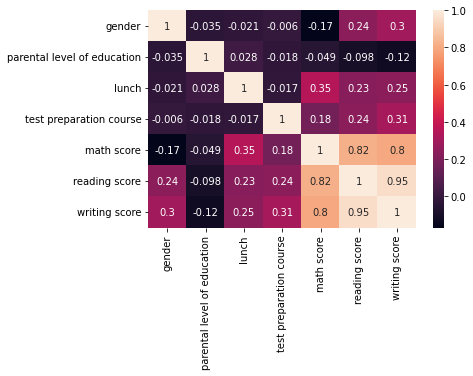

In [15]:
sns.heatmap(df.corr(),annot=True) # Here we See the relationship of each feature 

In [16]:
# By Seen tha the 'parental level of education' has negative corelatin that's why we remove this.
df.drop(['parental level of education'],axis=1,inplace = True) 

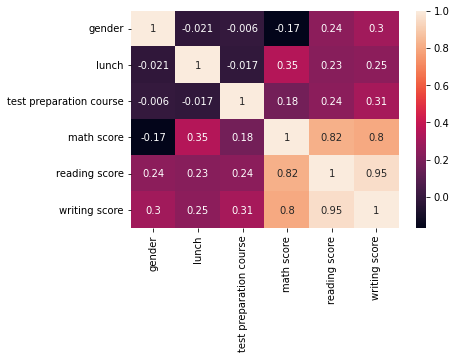

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
X = df.drop(['race/ethnicity'],axis=1).values
Y = df['race/ethnicity'].values

# Model Building Using Decision Tree

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [20]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler

standardscalar = StandardScaler()

X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_test)



In [21]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=100,)

classifier.fit(X_train,Y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state=10)

In [22]:
Y_predict =classifier.predict(X_test)

In [23]:
DecisionTree_Accuracy = accuracy_score(Y_test,Y_predict)*100

In [24]:
print('Accuracy Score is :',np.round(DecisionTree_Accuracy,0))

Accuracy Score is : 23.0


In [25]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

     group A       0.10      0.11      0.10        28
     group B       0.10      0.11      0.10        57
     group C       0.37      0.33      0.35       100
     group D       0.30      0.23      0.26        79
     group E       0.15      0.25      0.19        36

    accuracy                           0.23       300
   macro avg       0.20      0.20      0.20       300
weighted avg       0.25      0.23      0.24       300



# Building Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

Classifier = RandomForestClassifier(n_estimators=10 , criterion="entropy")

Classifier.fit(X_train,Y_train)

Y_pred = Classifier.predict(X_test) 

In [27]:
RandomForest_Accuracy = accuracy_score(Y_test,Y_pred)*100

In [28]:
print('Accuracy Score is :',np.round(RandomForest_Accuracy,0))

Accuracy Score is : 22.0


In [29]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

     group A       0.04      0.04      0.04        28
     group B       0.19      0.19      0.19        57
     group C       0.28      0.31      0.29       100
     group D       0.23      0.20      0.21        79
     group E       0.22      0.22      0.22        36

    accuracy                           0.22       300
   macro avg       0.19      0.19      0.19       300
weighted avg       0.22      0.22      0.22       300



# Building LogisticRegression Modele

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

logicregression = LogisticRegression(multi_class='multinomial',penalty='elasticnet',solver='saga',l1_ratio=0.9,n_jobs=-1)
logicregression.fit(X_train,Y_train)


LogisticRegression(l1_ratio=0.9, multi_class='multinomial', n_jobs=-1,
                   penalty='elasticnet', solver='saga')

In [31]:
Y_hat = logicregression.predict(X_test)

# print(Y_hat)

In [32]:
print(logicregression.predict([[1,118,0,72,72,74]]))

['group D']


In [33]:
Logistic_Accuracy = accuracy_score(Y_test,Y_hat)*100

In [34]:
print('Accuracy Score is :',np.round(Logistic_Accuracy,0))

Accuracy Score is : 36.0


In [35]:
Models_Accuracy = {'Decision Tree':[DecisionTree_Accuracy],
                   'Random Forest':[RandomForest_Accuracy],
                   'Logistic Regression':[Logistic_Accuracy]}

Model_Accuracy = pd.DataFrame(Models_Accuracy)

In [36]:
Model_Accuracy.head()

,Decision Tree,Random Forest,Logistic Regression
0,23.0,22.333333,35.666667


<Figure size 720x720 with 0 Axes>

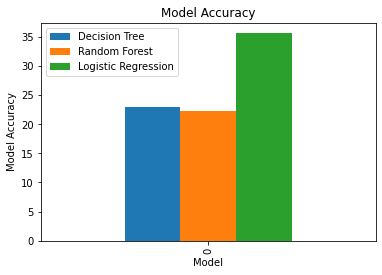

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

Model_Accuracy.plot.bar()
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.show()